## Investigating amino acid frequencies in proteins
Let's now plot the amino acid frequencies for a protein and compare the order with the metabolic costs of producing each aminoacid.

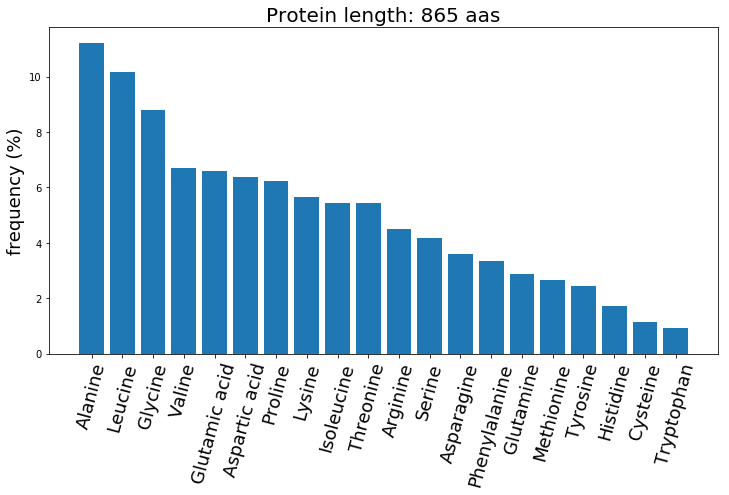

In [4]:
# Extract protein sequences first
#%load_ext autoreload
# %autoreload 2
FileName = 'uniprot_sprot_bacteria.txt'
# WorkDir = 'C:\\Users\\tinta\\OneDrive\\Documents\\Projects\\Frenquency_of_aminoacids\\'
from ParseUniprot import getProtSeq
from ParseUniprot import plot_aminoacid_freq
prot_seq = getProtSeq(WorkDir+FileName,['b0118'])
plot_aminoacid_freq(prot_seq['b0118'])

Total cost: 104576 phosphates/time


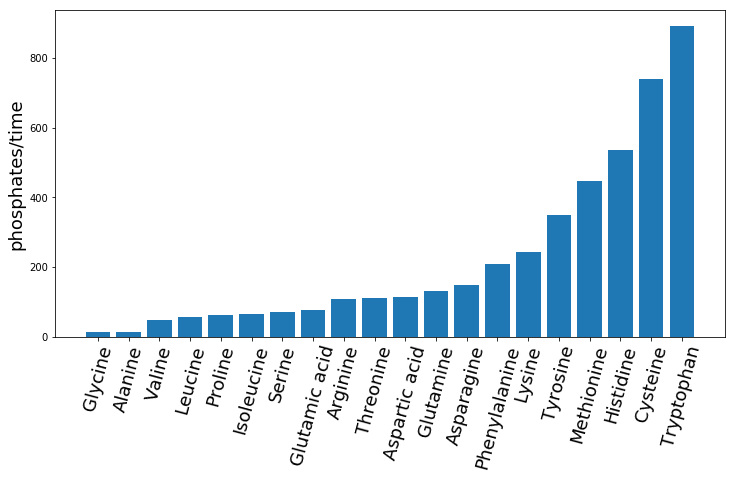

In [8]:
# Let's plot now the amino acids ordered by increasing metabolic cost
%autoreload 2
from ParseUniprot import getProtCost
from matplotlib import pyplot as plt

total_cost = getProtCost(prot_seq['b0118'])
print('Total cost: ' + str(total_cost) + ' phosphates/time')

aminoacids = {'G':'Glycine','A':'Alanine','L':'Leucine','M':'Methionine',
              'F':'Phenylalanine','W':'Tryptophan','K':'Lysine','Q':'Glutamine',
              'E':'Glutamic acid','S':'Serine','P':'Proline','V':'Valine',
              'I':'Isoleucine','C':'Cysteine','Y':'Tyrosine','H':'Histidine',
              'R':'Arginine','N':'Asparagine','D':'Aspartic acid','T':'Threonine'}

aa_costs = {'G':12,'A':12,'V':47,'L':55,'P':61,'I':65,'S':70,'E':77,
            'R':109,'T':112,'D':114,'Q':130,'N':147,'F':208,'K':242,
            'Y':350,'M':446,'H':536,'C':741,'W':892}

aa_name_cost = {}
for aa in aa_costs:
    aa_name_cost[aminoacids[aa]] = aa_costs[aa]

plt.figure(figsize = (12,6))
plt.bar(range(len(aa_name_cost)), list(aa_name_cost.values()), align='center')
plt.xticks(range(len(aa_name_cost)), list(aa_name_cost.keys()),rotation = 75,fontsize = 18)
plt.ylabel('phosphates/time', fontsize = 18)
plt.show()

## On trade offs between reactivity and metabolic cost of amino acids
Most abundant amino acids tend to be those with smaller costs. However, there are certain amino acids that must be present due to their chemical reactivity. I wonder, could be that there is a trade off between amino acid cost and reactivity? Perhaps favoring those that have slightly less reactivity but are cheaper to syntethize?

In fact, some people looked into it! Here: Krick et al. 2014, **Amino Acid Metabolism Conflicts with Protein Diversity**. They take into account amino acid costs and also the different decay rates! Decay time is included in Akashi and Gojobori 2002 along with amino acid costs.

**NOTE** as authors in the first paper point out, not all organisms can produce all amino acids! e.g. humans require ingestion of 6 essential amino acids. From wikipedia:
> *The nine amino acids humans cannot synthesize are phenylalanine, valine, threonine, tryptophan, methionine, leucine, isoleucine, lysine, and histidine (i.e., F V T W M L I K H)*

In [ ]:
from ParseUniprot import plotfreqAAs
FileName = 'uniprot_sprot_human.txt'
WorkDir = 'C:\\Users\\robaina\\OneDrive\\Documents\\Projects\\Frenquency_of_aminoacids\\'
sol = plotfreqAAs(WorkDir+FileName,2)

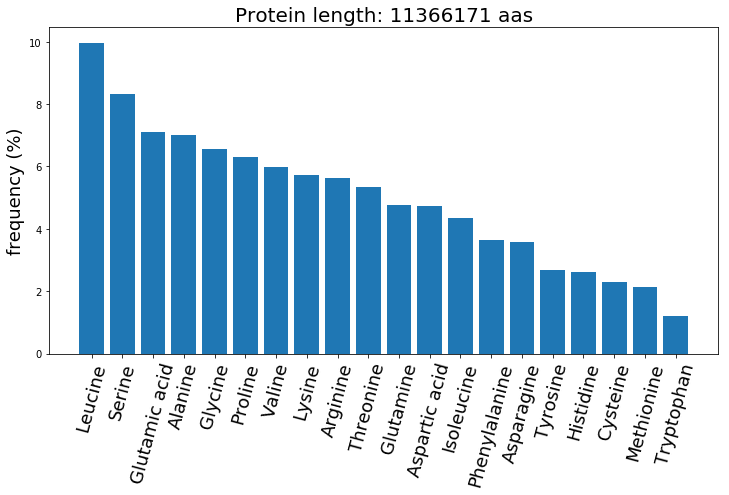

In [9]:
# Let's plot the aminoacid frequencies among all proteins in the bacteria file
from ParseUniprot import plot_aminoacid_freq
proteins_seq  = [y for x in list(sol['protein_seqs'].values()) for y in x]
plot_aminoacid_freq(proteins_seq)

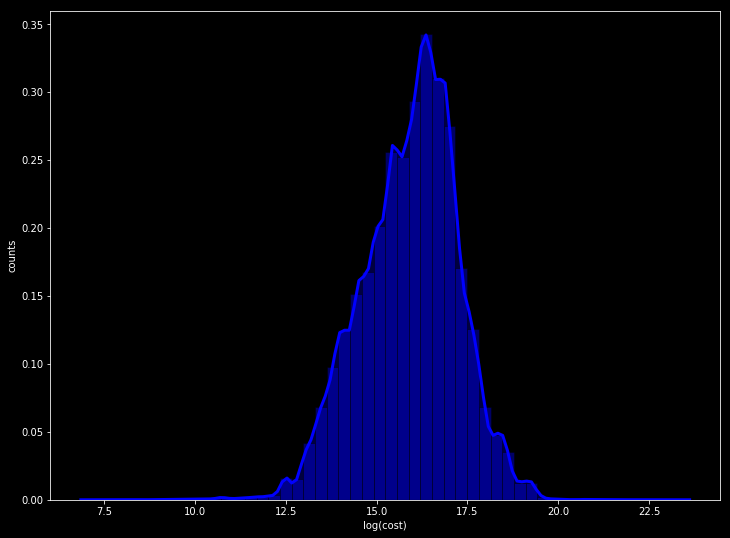

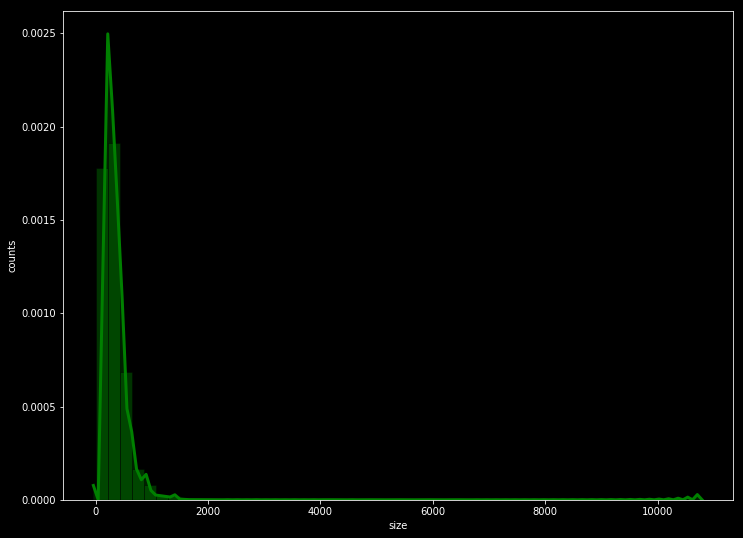

Mean cost: 18210909.351972107


In [1]:
from ParseUniprot import *
%matplotlib inline
plt.style.use('dark_background')
FileName = 'uniprot_sprot_bacteria.txt'
WorkDir = 'C:\\Users\\robaina\\OneDrive\\Documents\\Projects\\BRENDA_and_UNIPROT\\'

costs = np.array(getAllProteinsCosts(WorkDir+FileName))
print('Mean cost: ' + str(np.mean(costs)))